In [346]:
%run DensityPeakEstimation.ipynb

In [347]:
Delta_Density = np.loadtxt('DD.csv', delimiter=',', dtype=float)

In [348]:
Density_ = np.loadtxt('Dens.csv', delimiter=',', dtype=float)

In [349]:
Delta_ = np.loadtxt('Del.csv', delimiter=',', dtype=float)

In [350]:
PWDiffDist = np.loadtxt('D.csv', delimiter=',', dtype=float)

In [322]:
#centers = np.loadtxt('centers.csv', delimiter=',', dtype=int)

In [332]:
centers -=1

In [333]:
centers

array([4074, 1005, 6315, 2332, 2743, 5863])

In [341]:
gt[centers[0]]

13

In [344]:
len(np.where(gt == 0)[0])

1790

In [345]:
7138 - 1790

5348

In [351]:
import numpy as np

def land(X, K, GT, B, t):
    
    n = X.shape[0]
    Labels = np.zeros(n)
    centers = density_peaks_estimation(Delta_Density, B)
    
    #known points
    for i in range(B):
        Labels[centers[i]] = GT[centers[i]] + 1 #+1 to ensure unlabeled points have value of 0
    print(centers)
        
    # Sort points by density
    idx = np.argsort(Density_)[::-1]
    
    
    # Label highest density point if necessary
    
    if Labels[idx[0]] == 0:
        Labels[idx[0]] = GT[idx[0]] + 1
    
    '''
    for j in range(len(Labels)):
        if Labels[idx[j]] == 0:
            try:
                NN = np.argmin(PWDiffDist[idx[j], idx[:j]])  # Find nearest neighbor index
                Labels[idx[j]] = Labels[idx[NN]]
            except:
                pass
            
            # Special tie-breaking case when many values have the same density
            if Labels[idx[j]] == 0:
                temp = np.where(Labels > 0)[0]
                NN = np.argmin(PWDiffDist[idx[j], temp])  # Find nearest neighbor index among labeled points
                Labels[idx[j]] = Labels[temp[NN]]
    '''
    for j in range(n):
        
        if Labels[idx[j]] == 0:
            NN = np.argmin(PWDiffDist[idx[j], idx[:j]])
            Labels[idx[j]] = Labels[idx[NN]]
            

    return Labels




In [352]:
#mat_data = scipy.io.loadmat('SalinasA_smallnoise.mat')
mat_data = scipy.io.loadmat('SalinasA.mat')
#mat_data = scipy.io.loadmat('SalinasA_corrected.mat')


data = mat_data["salinasA"]
#data = mat_data["X"]


x, y, z = data.shape
salinasA = data.reshape((x*y, z))

In [353]:
norms = np.linalg.norm(salinasA, axis=1)

# Normalize each pixel vector by dividing by its norm
salinasA = salinasA / norms[:, np.newaxis]

In [354]:
mat_data_gt = scipy.io.loadmat('salinasA_gt.mat')
gt = mat_data_gt["salinasA_gt"]
gt = gt.reshape(-1)

In [355]:
Land = land(salinasA, 100, gt, 40, 30)

[4074 1005 6315 2332 2743 5863 5066   80 4148  733 4737 4219 2580 3066
 2982 1179 3324 6602 4772 3112 3574 2660 6854 3161 4359 3406 2413 6563
 2911 2907 6598 1322 6792 5373 5853 5187 6444 4714 6296 3713]


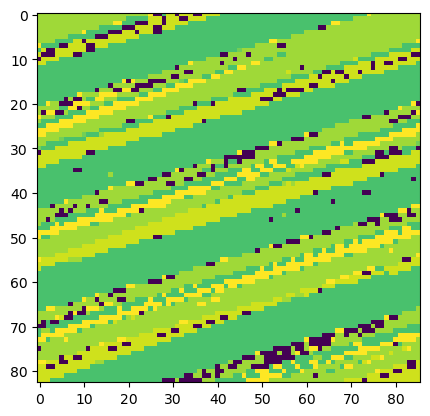

In [356]:
plt.imshow(Land.reshape(83, 86))

In [357]:
Land

array([13., 13., 13., ..., 14., 14., 14.])

In [358]:
testt = Land - 1

In [359]:
1 - np.sum(testt.reshape(83, 86) != gt.reshape(83, 86)) / 7138

0.2050994676379938